<a href="https://colab.research.google.com/github/harshalDharpure/-SVM-DNN-Approach-for-Intelligent-Transportation-Systems/blob/main/Car_Accident_CNN%2BSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf

from keras import optimizers
from keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

from keras.applications import ResNet50, DenseNet201
from keras.applications import resnet, densenet

import numpy as np
import matplotlib.pyplot as plt

import cv2
import os
import pandas as pd

## 2. Gathering Data

In [3]:
train_path = "/content/drive/MyDrive/Car Accident Detection using SVM +DNN/data/train"
valid_path = "/content/drive/MyDrive/Car Accident Detection using SVM +DNN/data/val"
test_path = "/content/drive/MyDrive/Car Accident Detection using SVM +DNN/data/test"

In [4]:
image_shape = (305,430,3)
N_CLASSES = 4
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(dtype='float32', rescale= 1./255.)
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (305,430),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32', rescale= 1./255.)
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (305,430),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32', rescale = 1.0/255.0)
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (305,430),
                                                   class_mode = 'categorical')

Found 791 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


#### Showing some pictures from the database we just imported

['Accident', 'Non Accident']


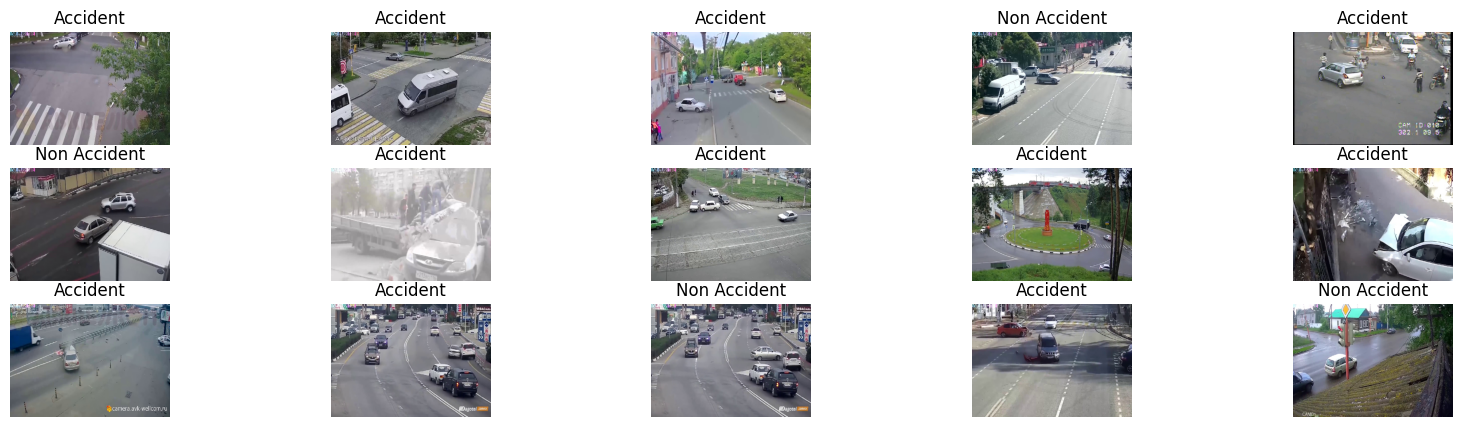

In [5]:
class_names=list(test_generator.class_indices.keys())
print(class_names)

fig = plt.figure(figsize=(20,5))

image_batch,label_batch = test_generator[1]
for i in range(15):
    ax = fig.add_subplot(3,5,i+1,xticks = [], yticks = [])
    ax.imshow(image_batch[i])
    plt.axis('off')
    plt.title(class_names[np.argmax(label_batch[i])])


## 3. Building the model

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=image_shape))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(256, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())

# Define the SVM layer
svm_layer = Dense(N_CLASSES, activation='linear', name='svm')

# Define the model
model = Sequential()
model.add(cnn_model)
model.add(svm_layer)

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='hinge', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=20,
                    steps_per_epoch=len(train_generator),
                    validation_data=valid_generator,
                    validation_steps=len(valid_generator))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)

Epoch 1/20
20/20 [==============================] - 7s 283ms/step - loss: 0.3506 - accuracy: 0.2561 - val_loss: 0.3194 - val_accuracy: 0.2083
Epoch 2/20
20/20 [==============================] - 6s 323ms/step - loss: 0.3181 - accuracy: 0.2529 - val_loss: 0.3194 - val_accuracy: 0.2083
Epoch 3/20
20/20 [==============================] - 5s 262ms/step - loss: 0.3181 - accuracy: 0.2529 - val_loss: 0.3194 - val_accuracy: 0.2083
Epoch 4/20
20/20 [==============================] - 6s 311ms/step - loss: 0.3181 - accuracy: 0.2529 - val_loss: 0.3194 - val_accuracy: 0.2083
Epoch 5/20
20/20 [==============================] - 5s 264ms/step - loss: 0.3181 - accuracy: 0.2529 - val_loss: 0.3194 - val_accuracy: 0.2083
Epoch 6/20
20/20 [==============================] - 5s 271ms/step - loss: 0.3181 - accuracy: 0.2529 - val_loss: 0.3194 - val_accuracy: 0.2083
Epoch 7/20
20/20 [==============================] - 6s 285ms/step - loss: 0.3181 - accuracy: 0.2529 - val_loss: 0.3194 - val_accuracy: 0.2083
Epoch 

## 4. Training the model

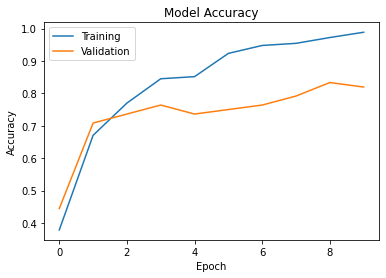

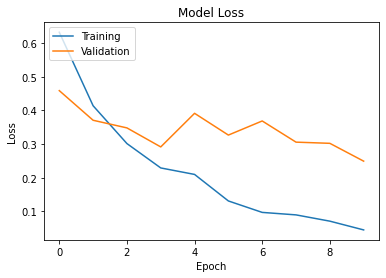

In [ ]:
import matplotlib.pyplot as plt

# Get the training and validation accuracy values from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Get the training and validation loss values from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the accuracy values
plt.plot(training_accuracy)
plt.plot(validation_accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

# Plot the loss values
plt.plot(training_loss)
plt.plot(validation_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()


<ipython-input-18-81280ff9a3ef>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator)


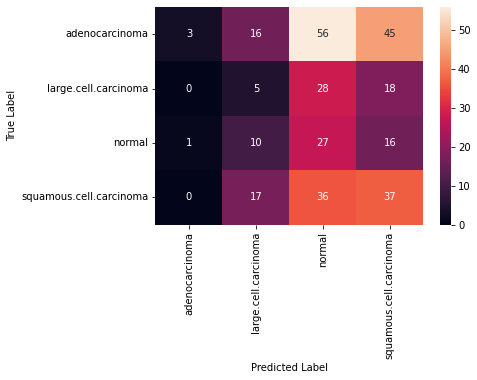

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels
y_true = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mtx, xticklabels=class_labels, yticklabels=class_labels, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


10/10 [==============================] - 4s 396ms/step


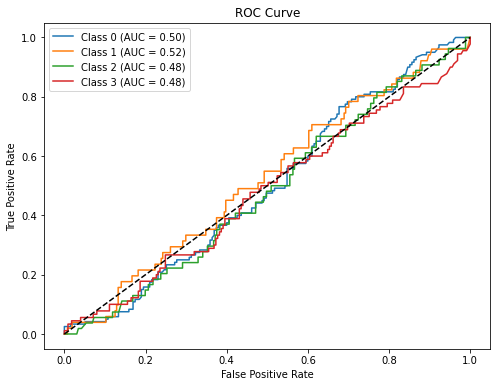

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for each class
y_pred = model.predict(test_generator)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(N_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(test_generator.classes == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(N_CLASSES):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot ROC curve for random guessing
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Make predictions on test set
test_preds = model.predict(test_generator)

# Convert predictions to class labels
test_preds = np.argmax(test_preds, axis=1)

# Generate classification report
print(classification_report(test_generator.classes, test_preds, target_names=class_names))


10/10 [==============================] - 2s 231ms/step
                         precision    recall  f1-score   support

         adenocarcinoma       0.50      0.02      0.03       120
   large.cell.carcinoma       0.08      0.08      0.08        51
                 normal       0.18      0.48      0.26        54
squamous.cell.carcinoma       0.27      0.34      0.30        90

               accuracy                           0.20       315
              macro avg       0.26      0.23      0.17       315
           weighted avg       0.31      0.20      0.16       315

